In [1]:
import time

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
spam_dataset = pd.read_csv('spam_tfidf.csv', index_col=[0])
spam_dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,targhet
0,0.000000,1.04567,0.570084,0.0,0.309696,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.553776,0.000000,0.00000,1
1,0.309672,0.45748,0.445378,0.0,0.135492,0.427637,0.365548,0.120390,0.000000,1.186630,...,0.000000,0.0,0.0,0.00000,0.069628,0.0,0.264787,0.214164,0.08707,1
2,0.088478,0.00000,0.632436,0.0,1.190396,0.290182,0.330734,0.206383,1.141600,0.315593,...,0.131159,0.0,0.0,0.01762,0.075430,0.0,0.196455,0.218923,0.01814,1
3,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.072265,0.0,0.097516,0.000000,0.00000,1
4,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.071210,0.0,0.096092,0.000000,0.00000,1


In [3]:
X = spam_dataset.drop('targhet', axis=1)
y = spam_dataset['targhet']  # colonna che segna se è o meno spam

# 'test_size' è il parametro che ci indica come dividere i dati, nel caso 0.20 significa che il 20% dei dati
# è usato per fare test, mentre l'80% è usato per fare training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Training time withnumber of estimator = 1: 0.137190
Prediction time: 0.012247
Miss-classified examples: 118
Accuracy: 0.872
Training time withnumber of estimator = 10: 0.270879
Prediction time: 0.016879
Miss-classified examples: 52
Accuracy: 0.944
Training time withnumber of estimator = 20: 0.522333
Prediction time: 0.050443
Miss-classified examples: 44
Accuracy: 0.952
Training time withnumber of estimator = 50: 0.676868
Prediction time: 0.036087
Miss-classified examples: 51
Accuracy: 0.945
Training time withnumber of estimator = 100: 1.249782
Prediction time: 0.036878
Miss-classified examples: 51
Accuracy: 0.945
Training time withnumber of estimator = 150: 1.397590
Prediction time: 0.062250
Miss-classified examples: 53
Accuracy: 0.942
Training time withnumber of estimator = 200: 1.703891
Prediction time: 0.065988
Miss-classified examples: 51
Accuracy: 0.945
Training time withnumber of estimator = 250: 2.413595
Prediction time: 0.094318
Miss-classified examples: 50
Accuracy: 0.946
Trai

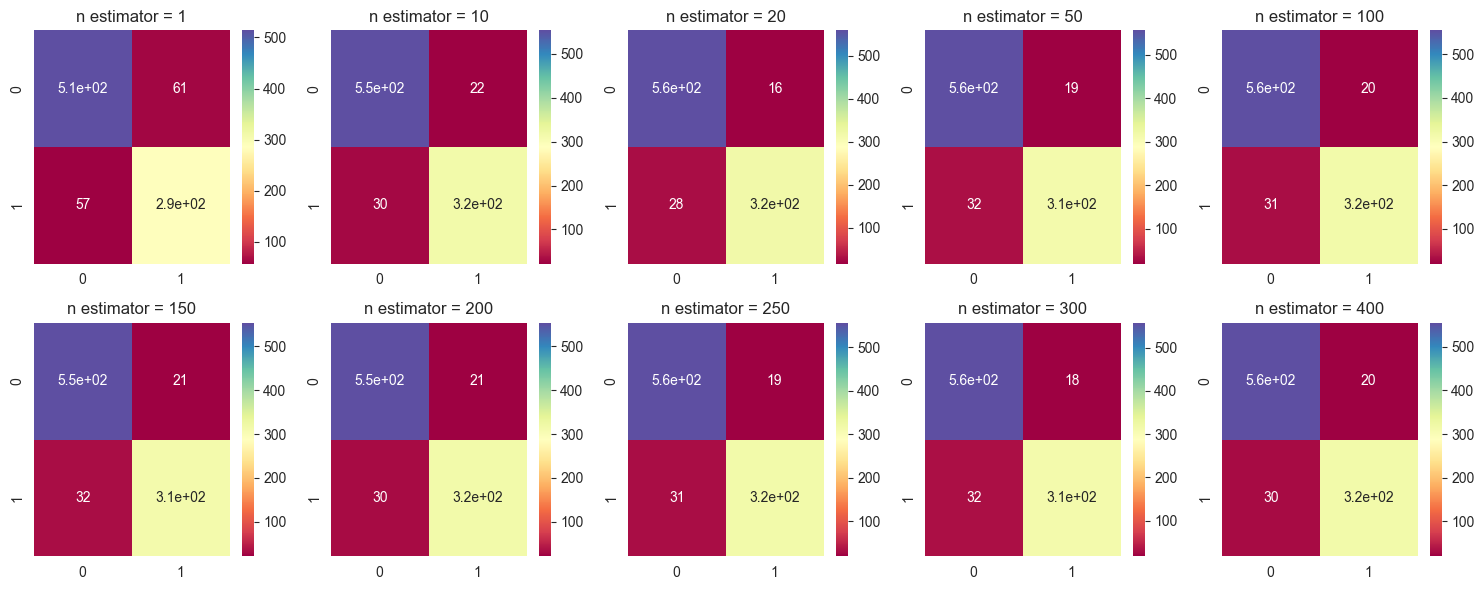

In [9]:
# ora posso fare il training sui dati, useremo un random forest classifier
number: list = [1, 10, 20, 50, 100, 150, 200, 250, 300, 400]
fis, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    RFC = RandomForestClassifier(n_estimators=number[i])
    start_time = time.time()
    RFC.fit(X_train, y_train)
    print(f'Training time withnumber of estimator = {number[i]}: %f' % (time.time() - start_time))
    start_time = time.time()
    y_predict = RFC.predict(X_test)
    print('Prediction time: %f' % (time.time() - start_time))
    print('Miss-classified examples: %d' % (y_test != y_predict).sum())
    print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))
    cm = confusion_matrix(y_test, y_predict)
    sn.heatmap(cm, annot=True, ax=axs[int(i / 5), i % 5], cmap=sn.color_palette("Spectral", as_cmap=True))
    axs[int(i / 5), i % 5].set_title('n estimator = ' + str(number[i]))
plt.tight_layout()
plt.show()

In [10]:
fis.savefig('confusion matrix random forest classifier.png', bbox_inches='tight')

In [ ]:
cm = confusion_matrix(y_test, y_predict)
cm

la cunfusion matrix serve per vedere in maniera veloce e chiara quante predizioni sono state fatte correttamente e se non è così, cosa è stato predetto al posto del valore vero. Nel nostro caso, in cui guardiamo solo se è spam o meno è poco utile, ma può tornare utile nel caso in cui i dati debbano essere divisi in più classi.

_seaborn_ è una libreria che serve per la visualizzazione dei dati, si basa su matplotlib, e offre una serie di interfacce pre-preparate.
Nel caso seguente ci fa vedere la confusion matrix con dei colori in modo da rencerci subito conto di quante volte sbaglia o meno il RandomForestClissifier usato in precedenza,

In [ ]:
% matplotlib inline
plt.figure(figsize=(5, 4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')